Предстоит определять качество вина. Необходимо решить задачу классификации с использованием SVM и подобрать наилучшее ядро.

# Importing the libraries

In [20]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

import sweetviz as sv
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [21]:
df = pd.read_csv('Data/winequality-red.csv', sep=';')

# Introduce

На основании загруженного датасета можно сделать следующее описание его признаков:

- **fixed acidity** - фиксированная кислотность;
- **volatile acidity** - летучая кислотность;
- **citric acid** - лимонная кислота;
- **residual sugar** - остаточный сахар;
- **chlorides** - хлориды;
- **free sulfur dioxide** - свободный диоксид серы;
- **total sulfur dioxide** - общий диоксид серы;
- **density** - плотность;
- **pH** - pH, т.н. водородный показатель или показатель кислотности;
- **sulphates** - сульфаты;
- **alcohol** - спирт;
- **quality** - качество.

Целевой переменной по заданию является признак **quality**. Остальные признаки - для обучения модели.

In [22]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
818,7.1,0.715,0.00,2.35,0.071,21.0,47.0,0.99632,3.29,0.45,9.4,5
167,7.3,0.550,0.03,1.60,0.072,17.0,42.0,0.99560,3.37,0.48,9.0,4
935,8.8,0.300,0.38,2.30,0.060,19.0,72.0,0.99543,3.39,0.72,11.8,6
838,10.1,0.310,0.35,1.60,0.075,9.0,28.0,0.99672,3.24,0.83,11.2,7
577,8.8,0.440,0.49,2.80,0.083,18.0,111.0,0.99820,3.30,0.60,9.5,5
863,7.2,0.620,0.06,2.50,0.078,17.0,84.0,0.99746,3.51,0.53,9.7,5
1049,9.3,0.500,0.36,1.80,0.084,6.0,17.0,0.99704,3.27,0.77,10.8,6
906,7.2,0.540,0.27,2.60,0.084,12.0,78.0,0.99640,3.39,0.71,11.0,5
206,12.8,0.300,0.74,2.60,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
668,10.0,0.730,0.43,2.30,0.059,15.0,31.0,0.99660,3.15,0.57,11.0,5


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# EDA

In [24]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [25]:
# Проверим дубликаты
duplicates = df.duplicated()
print('Всего дубликатов: {}'.format(duplicates.sum()))

Всего дубликатов: 240


In [26]:
# Удаление дубликатов
df.drop_duplicates(inplace=True)

In [27]:
# Проверка пропусков во всем датасете
missing_values = df.isnull().sum().sum()
print('Всего пропусков: {}'.format(missing_values))

Всего пропусков: 0


Признак **quality** распознан как категориальный, с шестью значениями. По рекомендациям в проекте, необходимо свести значения этого признака к двум: ``1 - good wine``, `0 - bad wine` ``('bad wine': quality < 6.5 и 'good wine': quality > 6.5)``.

In [28]:
# Преобразуем целевой признак в бинарный на основе входных условий
df['quality'] = df['quality'].apply(lambda x: 1 if float(x) > 6.5 else 0)
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1579,6.2,0.56,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,0
655,9.7,0.55,0.17,2.9,0.087,20.0,53.0,1.00040,3.14,0.61,9.4,0
1161,8.8,0.45,0.43,1.4,0.076,12.0,21.0,0.99551,3.21,0.75,10.2,0
1411,6.4,0.47,0.40,2.4,0.071,8.0,19.0,0.99630,3.56,0.73,10.6,0
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.9,1
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,1
694,9.0,0.47,0.31,2.7,0.084,24.0,125.0,0.99840,3.31,0.61,9.4,0
189,7.9,0.49,0.32,1.9,0.082,17.0,144.0,0.99680,3.20,0.55,9.5,0
632,7.6,0.41,0.14,3.0,0.087,21.0,43.0,0.99640,3.32,0.57,10.5,0
1133,7.2,0.48,0.07,5.5,0.089,10.0,18.0,0.99684,3.37,0.68,11.2,1


In [30]:
# Подготовим список колонок с признаками для обучения модели
lst_cols = list(df.columns.values)
lst_cols.remove('quality')

# Стандартизируем признаки для обучения
scaler = StandardScaler()
for column in lst_cols:
    df[column] = scaler.fit_transform(df[[column]])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.468554,-0.384050,0.584003,1.291872,-0.578561,-0.954374,0
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,-0.708395,0.124822,-0.584575,0
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,-0.085537,0.214813,0.155790,-0.321247,-0.051024,-0.584575,0
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.105971,0.394471,0.691057,-0.966495,-0.461331,-0.584575,0
5,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.277045,-0.204391,0.584003,1.291872,-0.578561,-0.954374,0


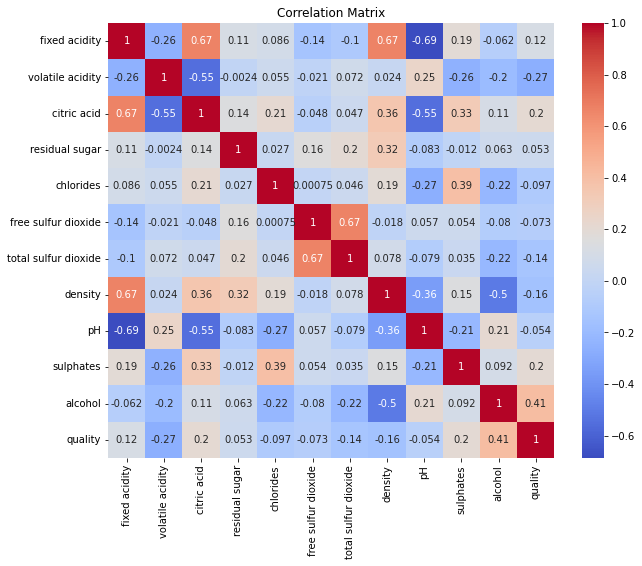

In [31]:
# Вычислим матрицу корреляции
corr_matrix = df.corr()

#  тепловая карта матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Добавив название графика
plt.title('Correlation Matrix')

# Отобразим график
plt.show()

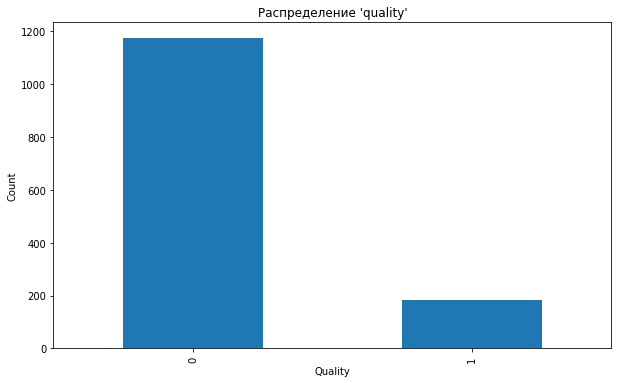

In [33]:
quality_counts = df['quality'].value_counts()
plt.figure(figsize=(10,6))
quality_counts.plot(kind='bar')
plt.title("Распределение 'quality'")
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

# Split data into train and test sets

Наблюдается дисбалан в нашей выборке. Поэтому Для данного проекта нам потребуется разбить проект на три части: обучающую, тестовую и валидационную. Используем следующие пророции разбиения - 3/1/1. 

In [34]:
df_train, df_test = train_test_split(df, stratify=df[['quality']], random_state=42, train_size=0.6)
df_test, df_valid = train_test_split(df_test, stratify=df_test[['quality']], random_state=42, train_size=0.5)
print('Количество строк тренировочной выборки:', len(df_train))
print('Количество строк тестовой выборки:', len(df_test))
print('Количество строк валидационной выборки:', len(df_valid))

Количество строк тренировочной выборки: 815
Количество строк тестовой выборки: 272
Количество строк валидационной выборки: 272


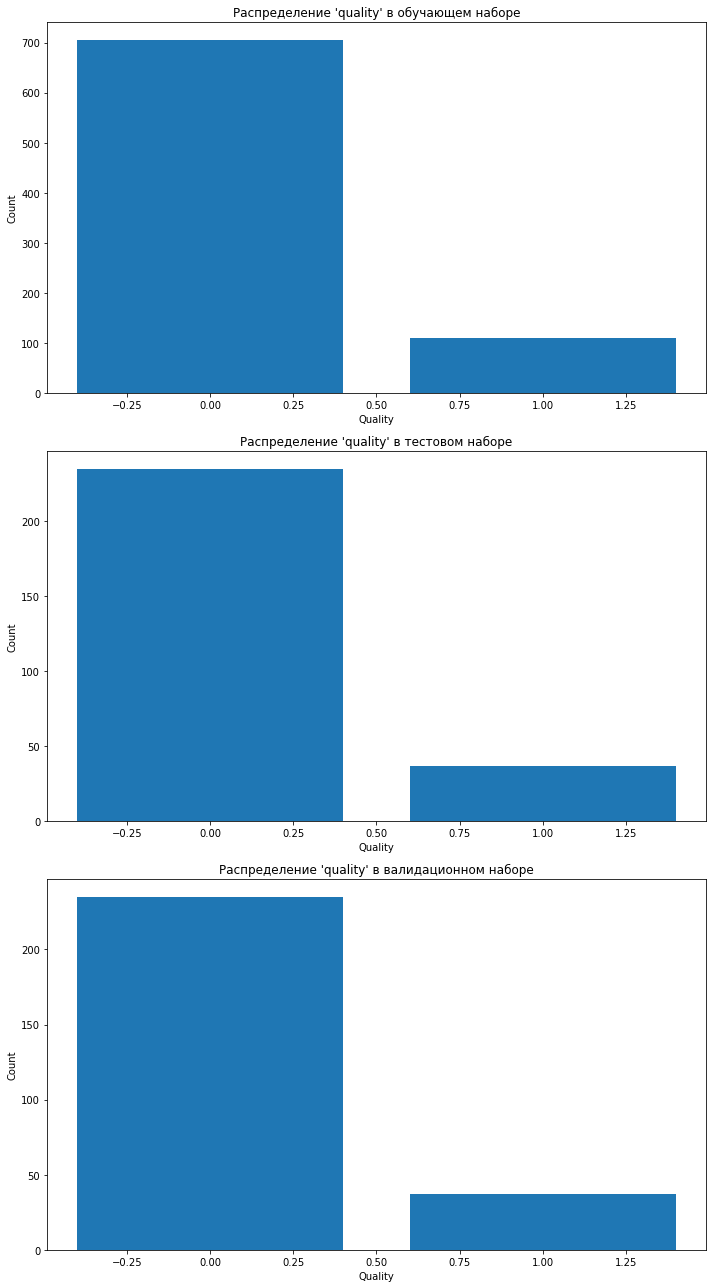

In [36]:
# Считаем количество различных значений 'quality' в каждом наборе данных
quality_counts_train = df_train['quality'].value_counts()
quality_counts_test = df_test['quality'].value_counts()
quality_counts_valid = df_valid['quality'].value_counts()

# Создаем figure и axes (3 подграфика)
fig, axs = plt.subplots(3, figsize=(10,18))

# Строим график для тренировочного набора
axs[0].bar(quality_counts_train.index, quality_counts_train.values)
axs[0].set_title("Распределение 'quality' в обучающем наборе")
axs[0].set_xlabel('Quality')
axs[0].set_ylabel('Count')

# Строим график для тестового набора
axs[1].bar(quality_counts_test.index, quality_counts_test.values)
axs[1].set_title("Распределение 'quality' в тестовом наборе")
axs[1].set_xlabel('Quality')
axs[1].set_ylabel('Count')

# Строим график для валидационного набора
axs[2].bar(quality_counts_valid.index, quality_counts_valid.values)
axs[2].set_title("Распределение 'quality' в валидационном наборе")
axs[2].set_xlabel('Quality')
axs[2].set_ylabel('Count')

# Оптимизируем расположение графиков
plt.tight_layout()

# Отображаем графики
plt.show()

Видно, что соотношение оценок качества вина не изменилось.

# SVM

Необходимо подобрать гиперпаметры на основании модели SVM. Для этого воспользуемся методом подбора гиперпараметров GridSearchCV, где одним из перебираемых параметром в сетке поиска будет ядро в модели SVC. Из данной модели, по условиям задания, будем обрабатывать следующие ядра: ['linear', 'poly', 'rbf', 'sigmoid'].

In [49]:
# Признаки для обучения из валидационной выборки
X = np.array(df_valid[lst_cols])

# Целевая переменная из валидационной выборки
y = np.array(df_valid['quality'])

print('Shape X: {}'.format(X.shape))
print('Shape y: {}'.format(y.shape))

Shape X: (272, 11)
Shape y: (272,)


In [42]:
# Подготовим значения параметров сетки поиска для SVC-модели
C_range = np.array([0.01, 0.05, 0.1, 1.05, 1.0])
gamma_range = ['scale', 'auto', 0.01, 0.1, 1, 10, 100]
kernel_range = ['linear', 'poly', 'rbf', 'sigmoid'] # Поиск лучшего ядра из списка
param_grid = dict(C=C_range, gamma=gamma_range, kernel=kernel_range)

# Используем стратифицированный перекрестный валидатор
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Инициируем SVC-модель с учетом балансировки целевой переменной
clf = SVC(class_weight='balanced', random_state=42)
# Передаем модель в GridSearchCV для подбора лучших гиперпараметров и запускаем на обработку
grid = GridSearchCV(clf, param_grid=param_grid, cv=cv, verbose=0)
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=SVC(class_weight='balanced', random_state=42),
             param_grid={'C': array([0.01, 0.05, 0.1 , 1.05, 1.  ]),
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [44]:
# Полученные лучшие параметры
grid.best_params_

{'C': 0.05, 'gamma': 'scale', 'kernel': 'poly'}

In [47]:
print('Best kernel is', grid.best_params_['kernel'])

Best kernel is poly


# Training model

In [50]:
# Признаки для обучения из обучающей выборки
X = np.array(df_train[lst_cols])

# Целевая переменная из обучающей выборки
y = np.array(df_train['quality'])
y.shape

print('Shape X: {}'.format(X.shape))
print('Shape y: {}'.format(y.shape))

Shape X: (815, 11)
Shape y: (815,)


In [51]:
clf = SVC(C=grid.best_params_['C'], gamma=grid.best_params_['gamma'], kernel=grid.best_params_['kernel'], class_weight='balanced', random_state=42)
clf.fit(X, y)

SVC(C=0.05, class_weight='balanced', kernel='poly', random_state=42)

In [52]:
# Оценка средней точности модели (accuracy) на обучающей выборке
print('Train accuracy:', clf.score(X, y))

Train accuracy: 0.8736196319018404


In [53]:
# confusion_matrix обучающей выборки
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[639,  66],
       [ 37,  73]], dtype=int64)

In [54]:
# Признаки для обучения из тестовой выборки
X = np.array(df_test[lst_cols])

# Целевая переменная из тестовой выборки
y = np.array(df_test['quality'])

print('Shape X: {}'.format(X.shape))
print('Shape y: {}'.format(y.shape))

Shape X: (272, 11)
Shape y: (272,)


In [55]:
# Оценка средней точности модели (accuracy) на тестовой выборке
y_pred = clf.predict(X)
print('Test accuracy:', clf.score(X, y))

Test accuracy: 0.8566176470588235


In [56]:
# confusion_matrix тестовой выборки
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[212,  23],
       [ 16,  21]], dtype=int64)

In [57]:
# Признаки для обучения из валидационной выборки
X = np.array(df_valid[lst_cols])

# Целевая переменная из валидационной выборки
y = np.array(df_valid['quality'])

print('Shape X: {}'.format(X.shape))
print('Shape y: {}'.format(y.shape))

Shape X: (272, 11)
Shape y: (272,)


In [58]:
# Оценки модели на кросс-валидации
scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
scores

array([0.89090909, 0.83636364, 0.85454545, 0.94545455, 0.89090909])

In [59]:
# Средняя оценка точности (accuracy) на кросс-валидации
print('CV accuracy:', scores.mean())

CV accuracy: 0.8836363636363636


In [60]:
# Cтандартное отклонение на кросс-валидации
print('CV standard deviation:', scores.std())

CV standard deviation: 0.03743865505813456


Наилучшее ядро для нашего кейса - это POLY-ядро. Оно позволило модели получить среднюю точность (accuracy) порядка около 87%.